In [1]:
import pandas as Pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import argparse
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import dump, load

In [2]:
df = Pd.read_csv('Raw_data\diabetes_dataset.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_17960\2524571958.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = Pd.read_csv('Raw_data\diabetes_dataset.csv')


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [3]:
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [4]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [5]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


Load & Inspect Dataset

In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = Pd.read_csv('Raw_data\diabetes_dataset.csv')

# Inspect dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())       # Missing values
print(df.duplicated().sum())   # Duplicates


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_17960\3899330162.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = Pd.read_csv('Raw_data\diabetes_dataset.csv')


   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                

Handle Duplicates

In [7]:
# Drop duplicate rows
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")


Dataset shape after removing duplicates: (100000, 31)


In [8]:
from sklearn.impute import SimpleImputer

# Numerical columns: fill NaN with median
num_cols = df.select_dtypes(include=np.number).columns
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Categorical columns: fill NaN with mode
cat_cols = df.select_dtypes(include='object').columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print(df.isnull().sum())  # Confirm no missing values


age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


as you can see we dont have any missing values in this dataset above 

In [9]:
df.duplicated().sum()

0

now as you can see above we have got (0) duplicated value

the Next step is to sort the encoding the values

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encode target column
le = LabelEncoder()
if 'diagnosed_diabetes' in df.columns:
    df['diagnosed_diabetes'] = le.fit_transform(df['diagnosed_diabetes'])

# One-hot encode other categorical features
df = pd.get_dummies(df, columns=['gender','ethnicity','education_level','employment_status','smoking_status','income_level'], drop_first=True)


next option is Handle Outliers

In [11]:
from scipy import stats

# Z-score method for numerical columns
z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Remove rows with outliers
print(f"Dataset shape after removing outliers: {df.shape}")


Dataset shape after removing outliers: (87625, 43)


now is the time to sort the correlations 


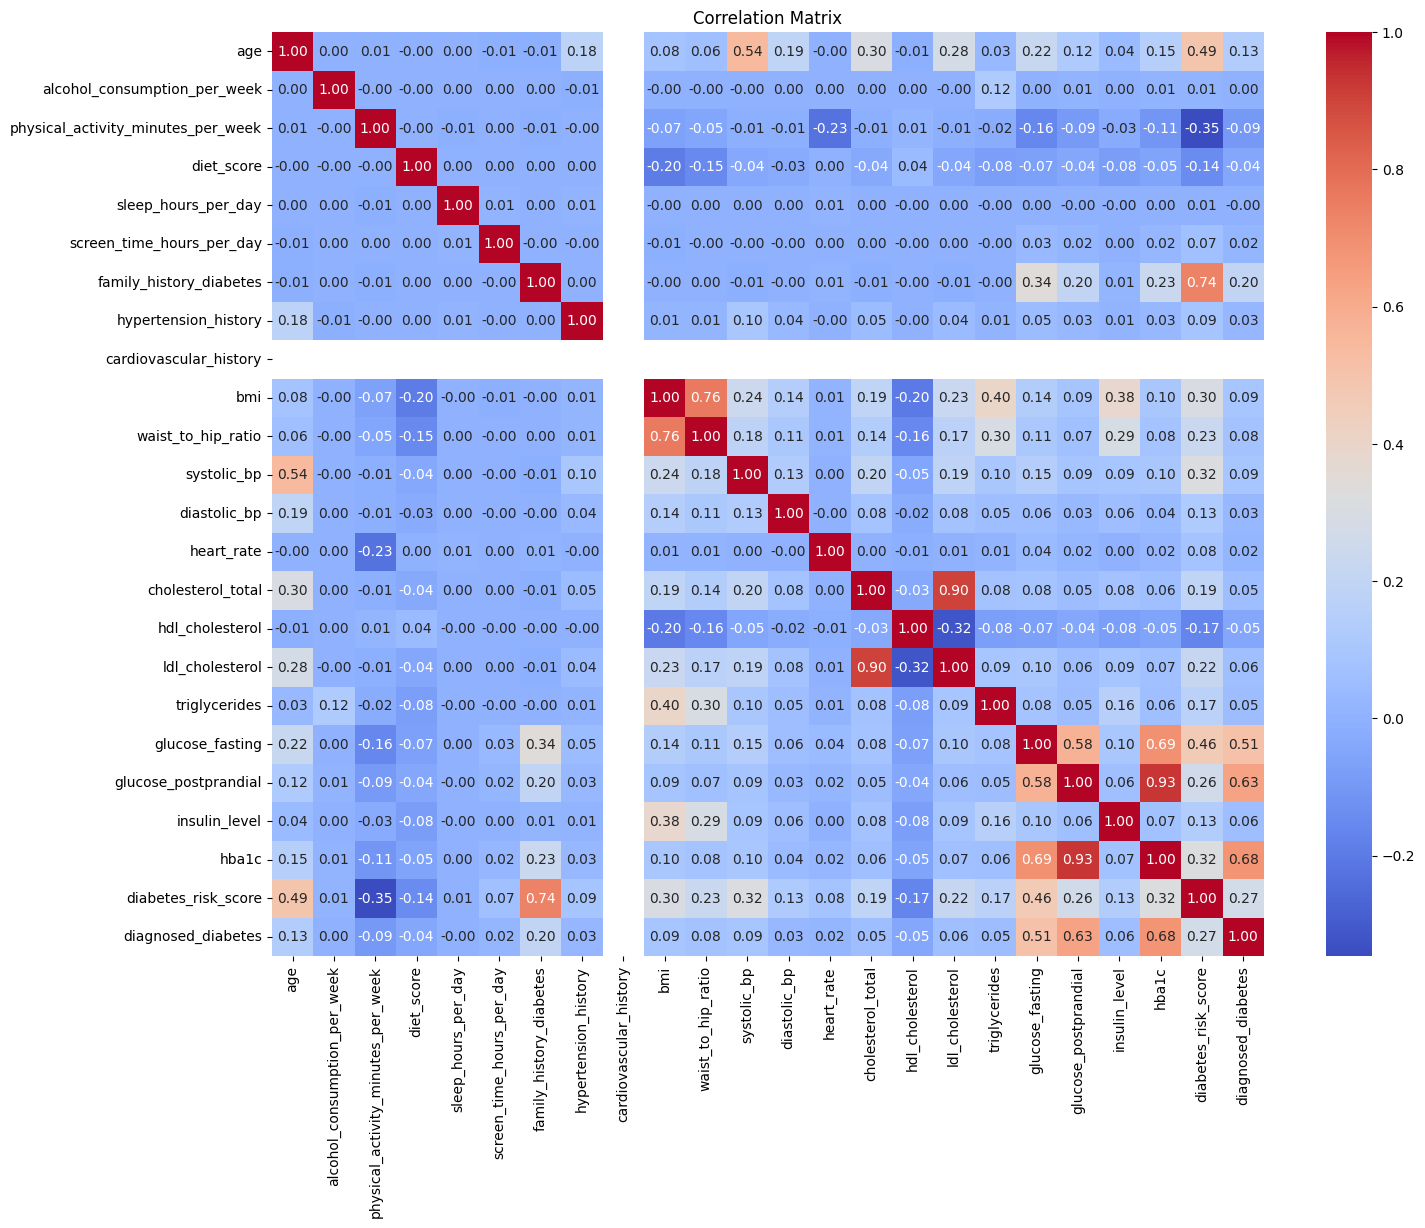

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Feature Transformation (Skewness)

In [14]:
from scipy import stats
# Identify skewed numerical columns
skewed_cols = df[num_cols].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > 0.75].index

# Apply log1p transformation
for col in skewed_cols:
    df[col] = np.log1p(df[col])


In [15]:
df

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,education_level_Postgraduate,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle
0,58.0,0.0,5.375278,5.7,7.9,7.9,0.000000,0.000000,0.0,30.5,...,False,False,False,False,False,True,False,True,False,False
1,48.0,1.0,4.969813,6.7,6.5,8.7,0.000000,0.000000,0.0,23.1,...,False,False,False,False,True,False,False,False,True,False
2,60.0,1.0,4.060443,6.4,10.0,8.1,0.693147,0.000000,0.0,22.2,...,False,False,False,True,False,True,False,False,True,False
4,46.0,1.0,4.700480,7.2,7.4,5.0,0.000000,0.000000,0.0,21.2,...,False,True,False,False,False,True,False,False,True,False
5,46.0,2.0,4.828314,9.0,6.2,5.4,0.000000,0.000000,0.0,26.1,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53.0,0.0,5.192957,5.4,6.1,4.5,0.000000,0.000000,0.0,25.8,...,False,False,False,True,False,False,False,False,True,False
99994,71.0,1.0,4.418841,6.3,6.9,4.8,0.000000,0.693147,0.0,20.5,...,False,False,False,False,False,True,False,True,False,False
99995,46.0,1.0,4.919981,8.3,6.4,4.5,0.000000,0.000000,0.0,29.8,...,False,False,False,True,True,False,False,False,False,True
99996,41.0,3.0,4.343805,8.8,6.8,4.8,0.000000,0.000000,0.0,26.5,...,False,False,False,False,False,True,False,False,True,False


next step is Standardize Numerical Features

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [17]:
df

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,education_level_Postgraduate,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle
0,0.562305,-1.440956,1.126863,-0.174711,0.825032,0.782264,-0.527295,-0.572953,0.0,1.398575,...,False,False,False,False,False,True,False,True,False,False
1,-0.084808,-0.713722,0.605679,0.391098,-0.461863,1.108989,-0.527295,-0.572953,0.0,-0.699476,...,False,False,False,False,True,False,False,False,True,False
2,0.691727,-0.713722,-0.563223,0.221355,2.755373,0.863945,1.896471,-0.572953,0.0,-0.954645,...,False,False,False,True,False,True,False,False,True,False
4,-0.214231,-0.713722,0.259479,0.674003,0.365427,-0.402111,-0.527295,-0.572953,0.0,-1.238165,...,False,True,False,False,False,True,False,False,True,False
5,-0.214231,0.013511,0.423796,1.692459,-0.737626,-0.238749,-0.527295,-0.572953,0.0,0.151085,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0.238748,-1.440956,0.892507,-0.344453,-0.829547,-0.606313,-0.527295,-0.572953,0.0,0.066029,...,False,False,False,True,False,False,False,False,True,False
99994,1.403552,-0.713722,-0.102540,0.164775,-0.094179,-0.483792,-0.527295,1.745343,0.0,-1.436630,...,False,False,False,False,False,True,False,True,False,False
99995,-0.214231,-0.713722,0.541625,1.296392,-0.553784,-0.606313,-0.527295,-0.572953,0.0,1.200111,...,False,False,False,True,True,False,False,False,False,True
99996,-0.537787,0.740745,-0.198990,1.579297,-0.186100,-0.483792,-0.527295,-0.572953,0.0,0.264493,...,False,False,False,False,False,True,False,False,True,False


then we move on to the Future engineering 

In [18]:
# Example: create a new feature for glucose ratio
df['glucose_ratio'] = df['glucose_postprandial'] / df['glucose_fasting']


then we sort and organise the dataset

In [19]:
# Sort by age for clarity
df = df.sort_values(by='age').reset_index(drop=True)
print(df.head())


        age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0 -2.026147                      2.195213                           -0.498400   
1 -2.026147                     -1.440956                            0.403063   
2 -2.026147                      0.013511                            1.299247   
3 -2.026147                      0.740745                            1.465020   
4 -2.026147                      0.740745                            0.700299   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day  \
0    0.730583            -1.472994                   0.087976   
1    0.108194             0.457348                  -0.810516   
2   -1.872138            -0.645705                  -0.483792   
3   -1.362910             0.273506                  -1.831529   
4    0.108194            -0.002258                  -1.300602   

   family_history_diabetes  hypertension_history  cardiovascular_history  \
0                 1.896471             -0.5729

In [22]:
df.to_csv('diabetes_clean.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
